# PlotResults

In [1]:
# imports
import os
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook

## Plotting Code

In [2]:
def load_results(res_dir):
    results = []
    for filename in os.listdir(res_dir):
        if not filename.endswith(".npy"): continue
        filepath = os.path.join(res_dir, filename)
        res = np.load(filepath)
        if len(res) != 201: continue
        results.append(res)
    results = np.vstack(results)
    return results

def load_lt_results(lt_dir):
    results = []
    for filename in os.listdir(lt_dir):
        if not filename.endswith("_longtail.pkl"): continue
        filepath = os.path.join(lt_dir, filename)
        save_dict = pickle.load(open(filepath, "rb"))
        res = save_dict["eps-returns"]
        results.append(res)
    return results

def plot_results(results):
    sns.set(style="darkgrid", font_scale=1.0)
    fig, ax = plt.subplots(figsize=(10,5))
    # dataframe magic; needed for seaborn
    df = pd.DataFrame(results).melt()
    df.rename(columns={"variable":"timestep",
                       "value":"return"},
              inplace=True)
    sns.lineplot(x="timestep", y="return", data=df, ax=ax)
    ax.set(title=f"Avg Return for TD3 on HalfCheetah")
    ax.set_xticks(np.arange(0, len(results[0]), 20))
    values = list(np.arange(0,int(1e6)+1,int(1e5)))
    ax.set_xticklabels(values)

def plot_lt_results(lt_results, kde=True):
    num_seeds = len(lt_results)
    for i in range(num_seeds):
        y = lt_results[i]
        fig, ax = plt.subplots(figsize=(10,5))
        if kde:
            sns.kdeplot(y, fill=True, cut=0, ax=ax)
        else:
            ax.hist(y, bins=100)
        ax.set(xlabel="return", ylabel="density",
               title=f"Seed{i}: Density of returns")
    plt.show()
    
def plot_state_visit(state_visit):
    fig, ax = plt.subplots(figsize=(10,5))
    y = list(state_visit.values())
    y.sort(reverse=True)
    x = np.arange(len(y))
    ax.plot(x, y)
    ax.set(xlabel="state_id", ylabel="visit count",
          title="State Visitation Plot")
    plt.show()

## Results for TD3 on HalfCheetah

### Training Results 0
5 seeds; trained for 1e6 timesteps; shaded area corresponds to 95% confidence interval

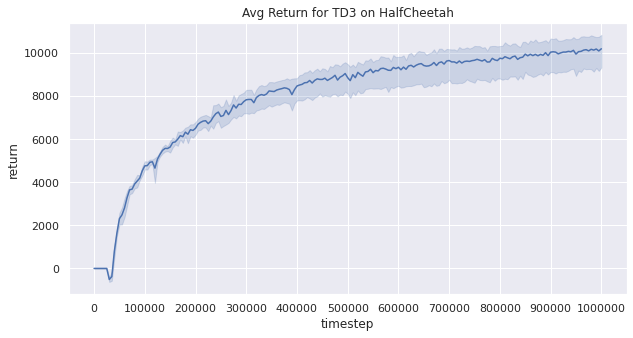

In [3]:
res_dir = "./results0"
results = load_results(res_dir)
plot_results(results)

### LongTail Evaluation 0

Evaluated on 1000 episodes

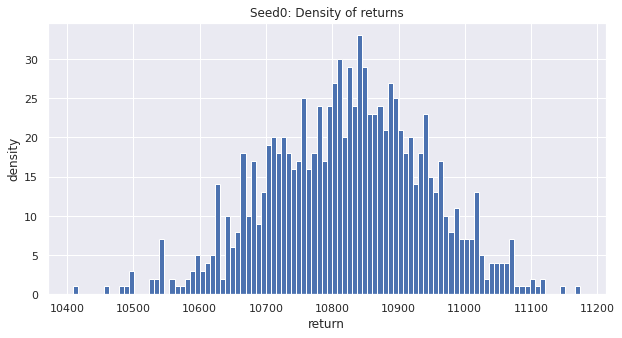

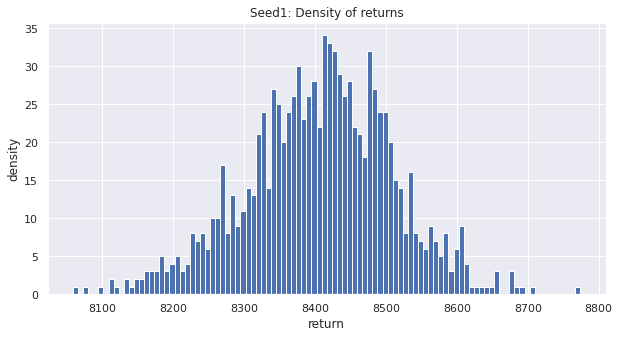

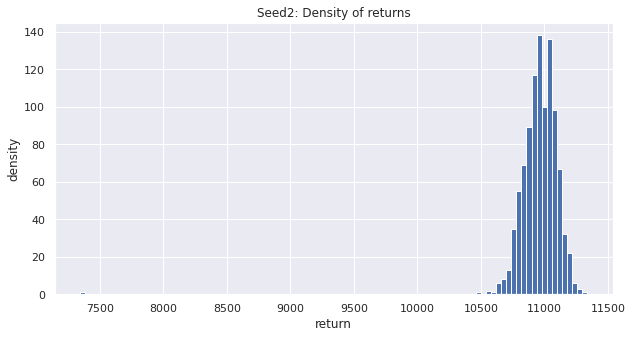

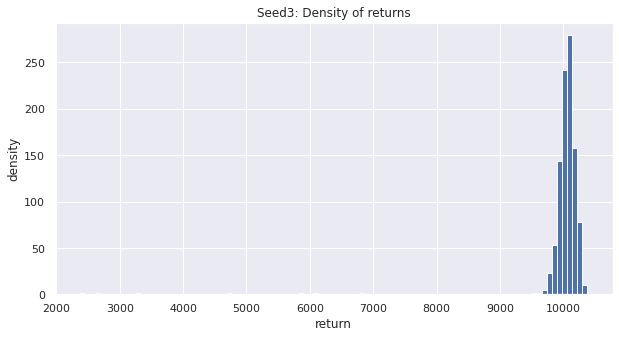

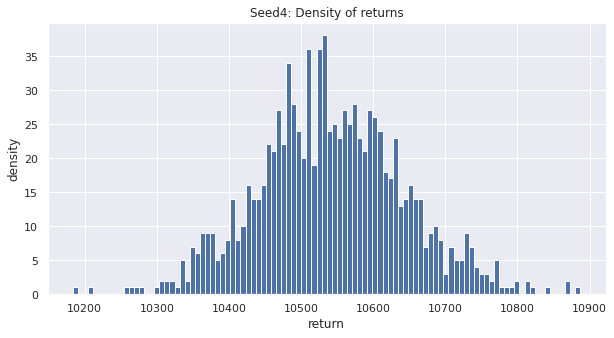

In [4]:
lt_dir = "./longtail_results0"
lt_results = load_lt_results(lt_dir)
plot_lt_results(lt_results, kde=False)

### Results0: Seed 2, Seed 3

In [5]:
# seed 2
res = lt_results[2]
res.sort()
print("Seed2 lowest 5 returns:", res[:5])

# seed 3
res = lt_results[3]
res.sort()
print("Seed3 lowest 10 returns:", res[:10])

Seed2 lowest 5 returns: [7344.467756861622, 10491.446562134168, 10572.948636303461, 10574.75196837277, 10597.132660478981]
Seed3 lowest 10 returns: [2374.716227367244, 2617.8962926599456, 3297.57968838755, 4714.163786873663, 5855.852583567458, 6116.944393061121, 6815.98772192734, 9573.020086752573, 9671.418541519924, 9677.674240303277]


### Training Results 1

3 seeds; trained for 1e6 timesteps; shaded area corresponds to 95% confidence interval;
modified algorithm to keep track of visited states.

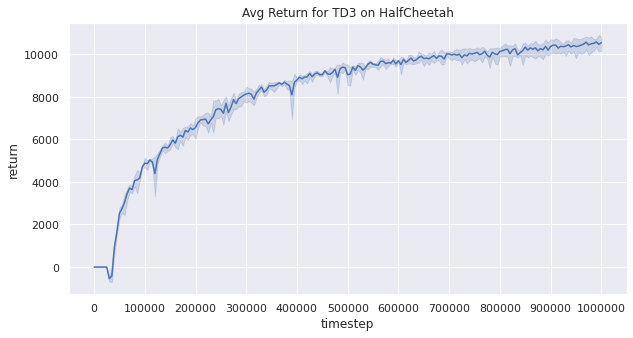

In [6]:
res_dir = "./results1"
results = load_results(res_dir)
plot_results(results)

### LongTail Evaluation 1

Evaluated on 1000 episodes

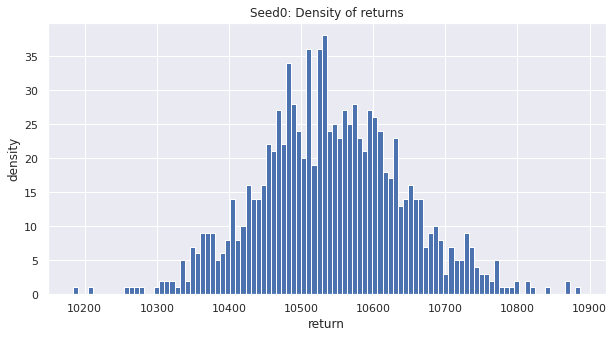

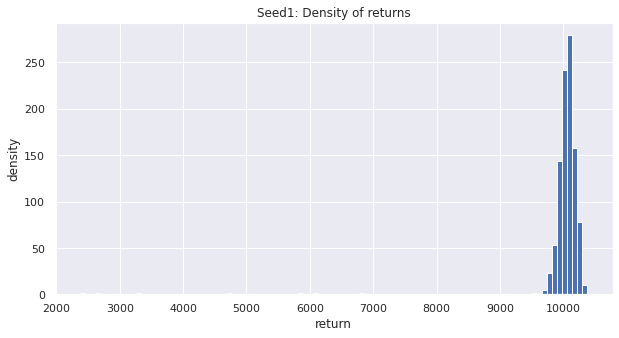

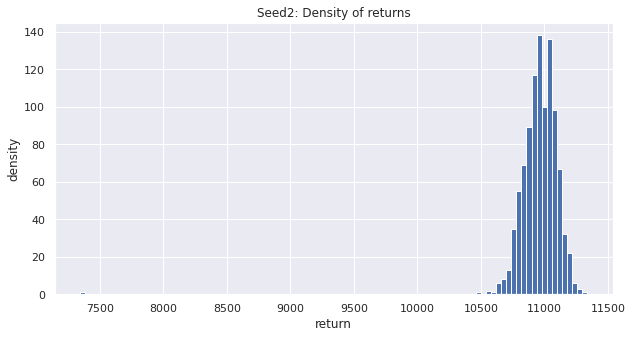

In [7]:
lt_dir = "./longtail_results1"
lt_results = load_lt_results(lt_dir)
plot_lt_results(lt_results, kde=False)

### Results1: Seed 1, Seed 2

In [8]:
# seed 1
res = lt_results[1]
res.sort()
print("Seed1 lowest 10 returns:", res[:10])

# seed 2
res = lt_results[2]
res.sort()
print("Seed3 lowest 10 returns:", res[:10])

Seed1 lowest 10 returns: [2374.716227367244, 2617.8962926599456, 3297.57968838755, 4714.163786873663, 5855.852583567458, 6116.944393061121, 6815.98772192734, 9573.020086752573, 9671.418541519924, 9677.674240303277]
Seed3 lowest 10 returns: [7344.467756861622, 10491.446562134168, 10572.948636303461, 10574.75196837277, 10597.132660478981, 10623.976747001936, 10638.016423233861, 10639.414321963814, 10641.041310380502, 10645.006141309546]


### State Visitation Analysis

Tracks marginal state distribution emperically

In [10]:
def load_state_visit_data(path):
    save_dict = pickle.load(open(path, "rb"))
    state_visit = save_dict["transitions"]
    return state_visit

def load_all_state_visit_data(root):
    all_state_visit = []
    for filename in os.listdir(root):
        if not filename.endswith("_trans.pkl"): continue
        filepath = os.path.join(root, filename)
        save_dict = pickle.load(open(filepath, "rb"))
        res = save_dict["transitions"]
        all_state_visit.append(res)
    return all_state_visit
        
root = "./results1"
all_state_visit = load_all_state_visit_data(root)

for seed, state_visit in enumerate(all_state_visit):
    print(f"\nSeed {seed}:")
    print("Number of unique states visited: ", len(state_visit))
    print("Highest visit count:", max(state_visit.values()))
    print("Lowest visit count:", min(state_visit.values()))
    print("Mean visit count: {:.2f}".format(np.mean(list(state_visit.values()))))


Seed 0:
Number of unique states visited:  996086
Highest visit count: 1063
Lowest visit count: 1
Mean visit count: 250.58

Seed 1:
Number of unique states visited:  996107
Highest visit count: 1070
Lowest visit count: 1
Mean visit count: 250.58

Seed 2:
Number of unique states visited:  996130
Highest visit count: 1082
Lowest visit count: 1
Mean visit count: 250.57


Plot state visitation frequency in descending order

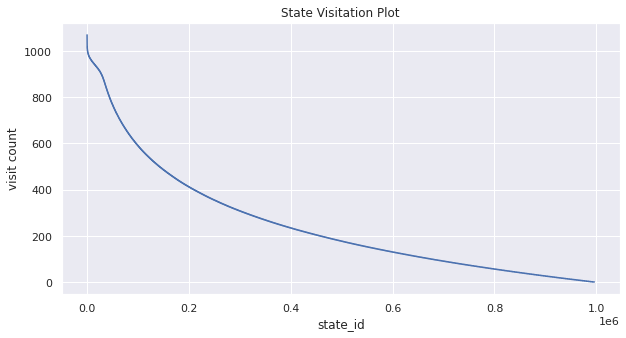

In [11]:
# seed 1
plot_state_visit(all_state_visit[1])

### Conditional State Distribution

Track conditional state distribution emperically.

In [ ]:
def load_cond_state_data(path):
    save_dict = pickle.load(open(path, "rb"))
    cond_freq = save_dict["cond_freq"]
    return cond_freq

state_path = 'results/TD3_HalfCheetah-v3_seed0_trans.pkl'
cond_freq = load_cond_state_data(state_path)
lens = [ sum(cond_freq[s]) for s in cond_freq]
print(f"avg_len: {np.mean(lens)}")
import pdb; pdb.set_trace()
a=1


avg_len: 498556.11508703383
--Return--
None
> /tmp/ipykernel_691/1219545542.py(10)<module>()
      7 cond_freq = load_cond_state_data(state_path)
      8 lens = [ sum(cond_freq[s]) for s in cond_freq]
      9 print(f"avg_len: {np.mean(lens)}")
---> 10 import pdb; pdb.set_trace()
     11 a=1



# The End